In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100 
mpl.rcParams['font.size'] = 7

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns 


df = pd.read_csv('clean_data.csv',sep=';')

In [15]:
df['default payment next month'].mean()

df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'another', 'high_school',
       'pos_graduate', 'university'],
      dtype='object')

In [17]:
logistic_regression = LogisticRegression(C=1, class_weight=None, dual=False,
fit_intercept=True,
intercept_scaling=1, max_iter=100, 
n_jobs=None, penalty='l2', random_state=None, solver='warn',
tol=0.0001, verbose=0, warm_start=False)

logistic_regression.C = 0.1
logistic_regression.solver = 'liblinear'



In [18]:
not_useful_colunms = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','ID','SEX','EDUCATION_CAT', 'EDUCATION']

useful_colunms = [colunm for colunm in df.columns if colunm not in not_useful_colunms ] # filtering useful columns

useful_colunms

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'another',
 'high_school',
 'pos_graduate',
 'university']

<Axes: >

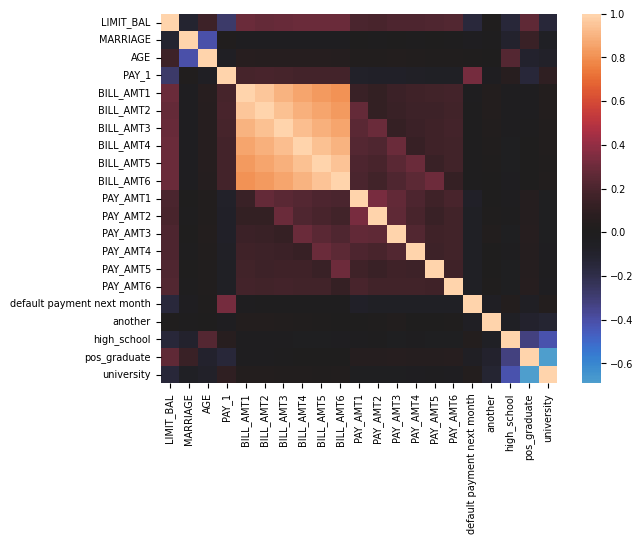

In [ ]:
correlation_matrix = df[useful_colunms].corr() #correlation matrix of each for each colunms (pearson correlation (linear 1: + + -1: + -) Valid only for continous prediction)

sns.heatmap(correlation_matrix,
xticklabels=correlation_matrix.columns.values,
yticklabels=correlation_matrix.columns.values,
center=0)


In [20]:


# Separate the data independent variables (X) and target (y)
# X = df.drop(columns=['default payment next month', 'EDUCATION_CAT','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'ID'])  # all columns except target
y = df['default payment next month']  # target
X = df[['EDUCATION','LIMIT_BAL' ]]


# split the data with stratify -> train and test has the same distribution avoiding unbalances
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=24, 
    stratify=y
)


print(X_train.shape)
print(X_test.shape)


(21331, 2)
(5333, 2)


In [21]:
logistic_regression.fit(X=X_train, y=y_train)

print(logistic_regression.coef_)

y_pred = logistic_regression.predict(X_test)



[[-1.30072715e-10 -6.82669948e-06]]


In [22]:


# accuracy of the results 
print(metrics.accuracy_score(y_pred= y_pred, y_true= y_test))

metrics.confusion_matrix(y_pred= y_pred, y_true= y_test)

# TN: true negative  FP: false positive
# FN: false negative TP: true positive

# recall = true positives / positives (true positives + false negatives) (how many true positives between all the true positives)
# precision = true positves / (false positives + true positives) (how many true positives between all classified positive)

0.7781736358522408


array([[4150,    0],
       [1183,    0]])

0.6304590127203659


Text(0.5, 1.0, 'ROC curve')

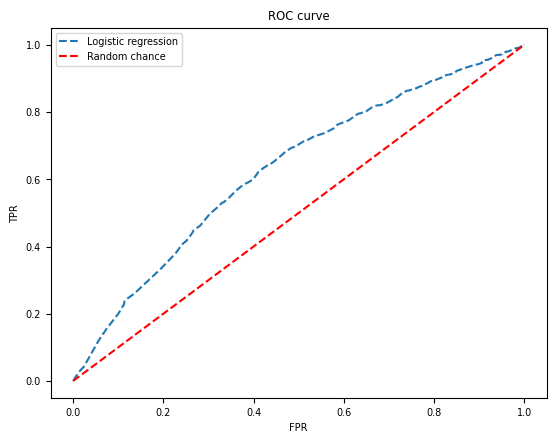

In [23]:
y_prob_pred =  logistic_regression.predict_proba(X_test)  #y_prob_pred[0] = prob of negative, [1] = prob of positive
pos_prob = y_prob_pred[:,1] # only the prob of the positive

# default threshold equal 0,5, so if the prob is equal or bigger than 0,5 is positive


fpr, tpr, thresholds1 = metrics.roc_curve( y_test ,pos_prob) # finding a good threshold

print(metrics.roc_auc_score(y_test, pos_prob))


plt.plot(fpr, tpr, '--')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


0.31139736786151817


(0.0, 1.0)

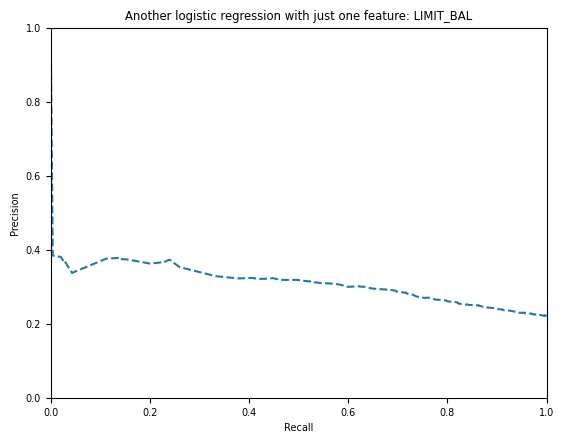

In [24]:
precision, recall, thresholds2 = metrics.precision_recall_curve(y_test, pos_prob)

print(metrics.auc(recall, precision))

plt.plot(recall, precision, '--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Another logistic regression with just one feature: LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])